In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year


In [91]:
df_hr = df[['traffic_volume', 'hour']].groupby('hour').mean().reset_index()
df_yr = df[['traffic_volume', 'year']].groupby('year').mean().reset_index()
df_dow = df[['traffic_volume', 'day_of_week']].groupby('day_of_week').mean().reset_index()
df_month = df[['traffic_volume', 'month']].groupby('month').mean().reset_index()

In [89]:
df[['traffic_volume', 'year']].groupby('year').mean()

,traffic_volume
year,
2012,3207.802657
2013,3286.762160
2014,3250.938004
2015,3242.900983
2016,3169.441328
2017,3340.703065
2018,3260.112341


In [87]:
df[['traffic_volume', 'day_of_week']].groupby('day_of_week').mean()

,traffic_volume
day_of_week,
0,3309.387161
1,3488.555799
2,3583.196681
3,3637.899663
4,3656.358836
5,2773.638120
6,2368.588329


In [85]:
df[['traffic_volume', 'month']].groupby('month').mean()

,traffic_volume
month,
1,3051.081378
2,3197.945547
3,3308.388611
4,3304.372388
5,3366.319432
6,3419.077413
7,3205.481752
8,3394.241891
9,3303.049334


In [7]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [76]:
df["traffic_vol_rolling_6h"] = df["traffic_volume"].rolling(window=6).mean().shift(1)
df["traffic_vol_rolling_12h"] = df["traffic_volume"].rolling(window=12).mean().shift(1)
df["traffic_vol_rolling_24h"] = df["traffic_volume"].rolling(window=24).mean().shift(1)
df["traffic_vol_rolling_1w"] = df["traffic_volume"].rolling(window=24*7).mean().shift(1)
df["traffic_vol_rolling_4w"] = df["traffic_volume"].rolling(window=24*7*4).mean().shift(1)





In [77]:
df_filt = df[(pd.to_datetime('2017-01-01') <= df['date_time']) &  (df['date_time'] <= pd.to_datetime('2017-01-31'))]

In [78]:
df_filt.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month,year,month_year,traffic_vol_rolling,traffic_vol_rolling_6h,traffic_vol_rolling_12h,traffic_vol_rolling_24h,traffic_vol_rolling_1w,traffic_vol_rolling_4w
29650,NaN,269.75,0.0,0.0,75,Clouds,broken clouds,2017-01-01 00:00:00,1848,0,6,1,2017,0 2012\n1 2012\n2 2012\n3...,3269.166667,3269.166667,3827.833333,2686.375,2867.482143,2864.944940
29651,NaN,269.95,0.0,0.0,1,Clear,sky is clear,2017-01-01 01:00:00,1806,1,6,1,2017,0 2012\n1 2012\n2 2012\n3...,2941.166667,2941.166667,3651.750000,2715.375,2865.696429,2860.427083
29652,NaN,269.75,0.0,0.0,1,Clear,sky is clear,2017-01-01 02:00:00,1211,2,6,1,2017,0 2012\n1 2012\n2 2012\n3...,2579.833333,2579.833333,3452.833333,2755.750,2863.660714,2855.965774
29653,NaN,269.65,0.0,0.0,40,Clouds,scattered clouds,2017-01-01 03:00:00,794,3,6,1,2017,0 2012\n1 2012\n2 2012\n3...,2033.333333,2033.333333,3172.833333,2755.750,2857.916667,2850.236607
29654,NaN,269.48,0.0,0.0,1,Clear,sky is clear,2017-01-01 04:00:00,500,4,6,1,2017,0 2012\n1 2012\n2 2012\n3...,1678.833333,1678.833333,2866.083333,2755.750,2849.690476,2844.599702


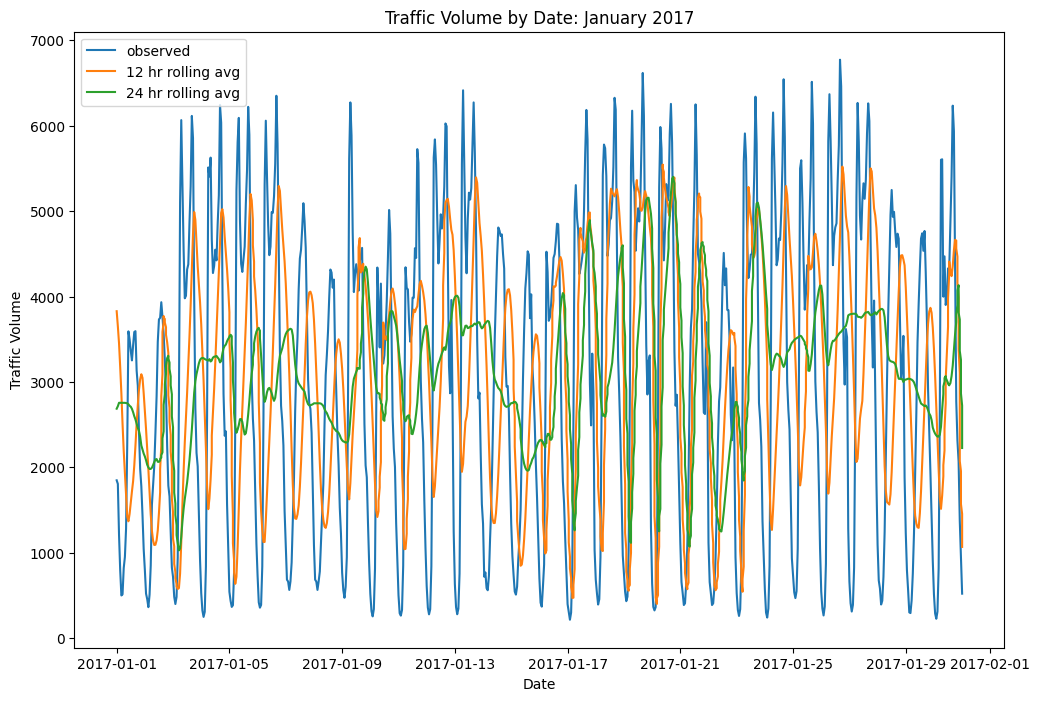

In [79]:
# traffic volume for one month
fig = plt.figure(figsize = (12, 8))
plt.plot(df_filt['date_time'], df_filt['traffic_volume'], label = 'observed')
#plt.plot(df_filt['date_time'], df_filt['traffic_vol_rolling_6h'], label = '6 hr rolling avg')
plt.plot(df_filt['date_time'], df_filt['traffic_vol_rolling_12h'], label = '12 hr rolling avg')
plt.plot(df_filt['date_time'], df_filt['traffic_vol_rolling_24h'], label = '24 hr rolling avg')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Date: January 2017')
plt.legend()
plt.show()

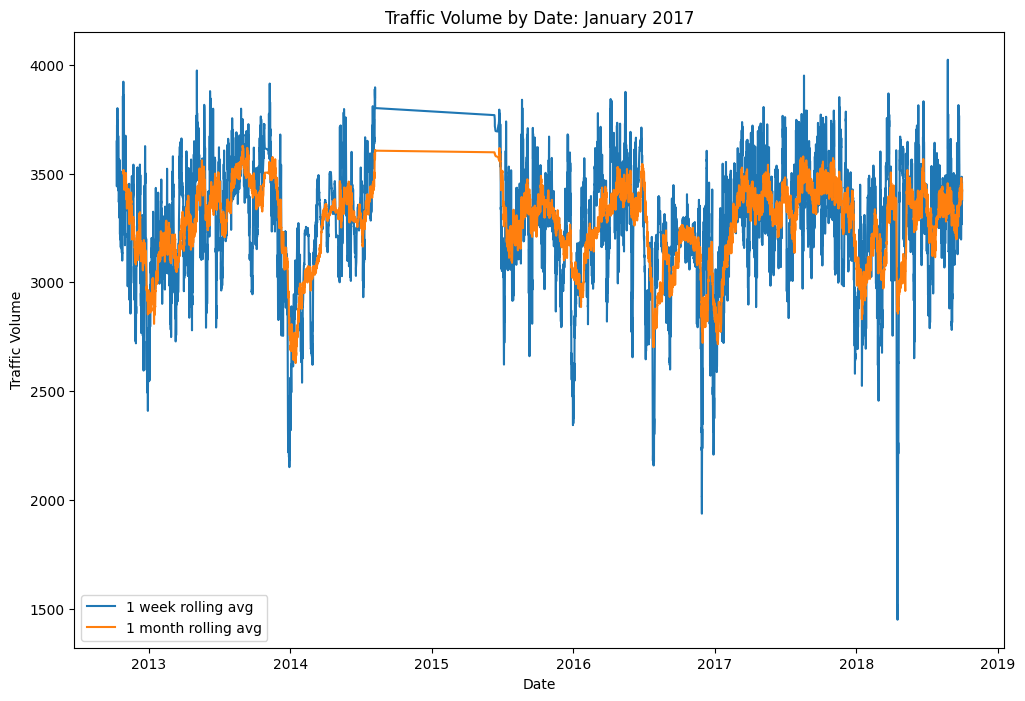

In [ ]:
# traffic volume for one month
fig = plt.figure(figsize = (12, 8))
#plt.plot(df['date_time'], df['traffic_volume'], label = 'observed')
#plt.plot(df_filt['date_time'], df_filt['traffic_vol_rolling_6h'], label = '6 hr rolling avg')
#plt.plot(df['date_time'], df['traffic_vol_rolling_12h'], label = '12 hr rolling avg')
plt.plot(df['date_time'], df['traffic_vol_rolling_24h'], label = '24 hr rolling avg')
plt.plot(df['date_time'], df['traffic_vol_rolling_1w'], label = '1 week rolling avg')
plt.plot(df['date_time'], df['traffic_vol_rolling_4w'], label = '1 month rolling avg')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Date: January 2017')
plt.legend()
plt.show()

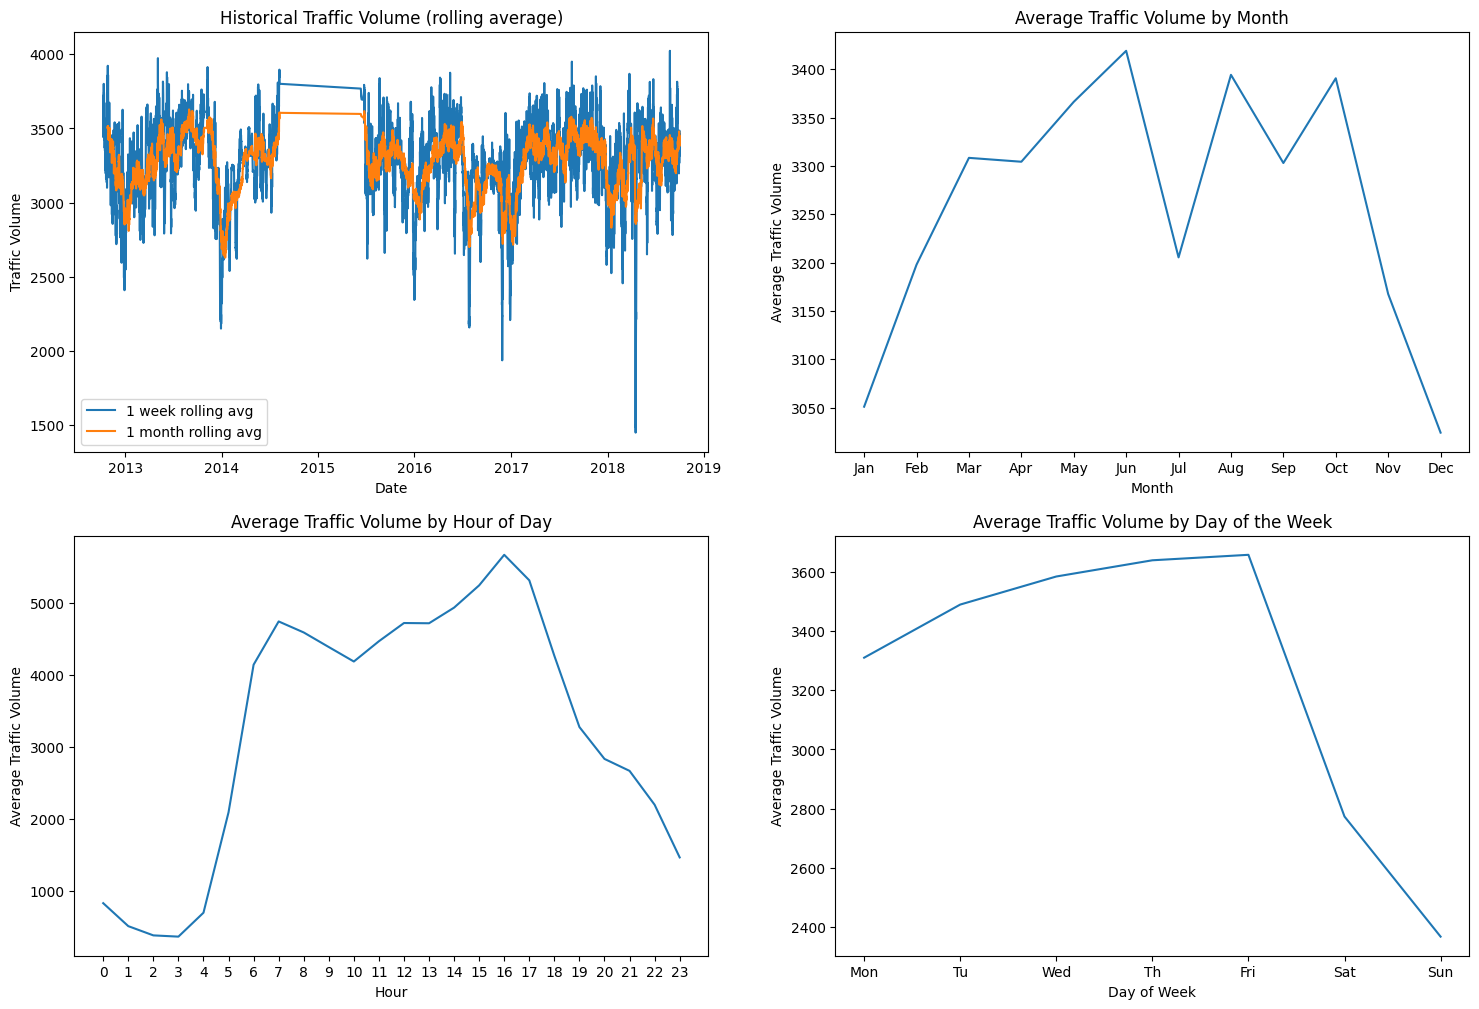

In [119]:
fig, ax = plt.subplots(2, 2, figsize = (18, 12))

ax[0,0].plot(df['date_time'], df['traffic_vol_rolling_1w'], label = '1 week rolling avg')
ax[0,0].plot(df['date_time'], df['traffic_vol_rolling_4w'], label = '1 month rolling avg')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Traffic Volume')
ax[0,0].legend()
ax[0,0].set_title('Historical Traffic Volume (rolling average)')


ax[0,1].plot(df_month['month'], df_month['traffic_volume'])
ax[0,1].set_xticks(list(range(1, 13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0,1].set_xlabel('Month')
ax[0,1].set_ylabel('Average Traffic Volume')
ax[0,1].set_title('Average Traffic Volume by Month')

ax[1,0].plot(df_hr['hour'], df_hr['traffic_volume'])
ax[1,0].set_xticks(list(range(0, 24)))
ax[1,0].set_xlabel('Hour')
ax[1,0].set_ylabel('Average Traffic Volume')
ax[1,0].set_title('Average Traffic Volume by Hour of Day')


ax[1,1].plot(df_dow['day_of_week'], df_dow['traffic_volume'])
ax[1,1].set_xticks([0,1,2,3,4,5,6], ['Mon', 'Tu', 'Wed', 'Th', 'Fri', 'Sat', 'Sun'])
ax[1,1].set_xlabel('Day of Week')
ax[1,1].set_ylabel('Average Traffic Volume')
ax[1,1].set_title('Average Traffic Volume by Day of the Week')


plt.savefig('traffic_volume_fig.pdf')

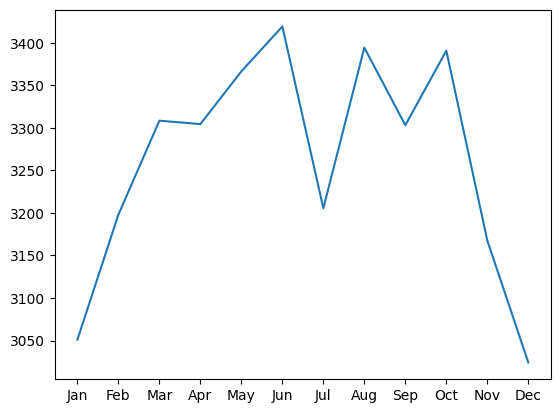

In [100]:
plt.plot(df_month['month'], df_month['traffic_volume'])
plt.xticks(list(range(1, 13)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

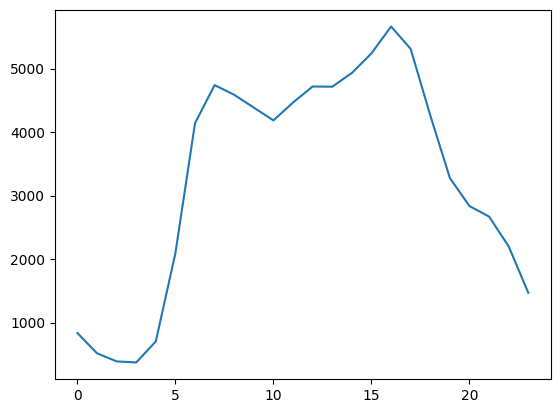

In [94]:
plt.plot(df_hr['hour'], df_hr['traffic_volume'])
plt.show()

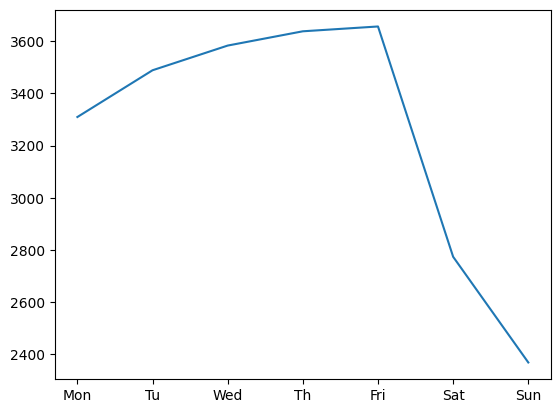

In [96]:
plt.plot(df_dow['day_of_week'], df_dow['traffic_volume'])
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tu', 'Wed', 'Th', 'Fri', 'Sat', 'Sun'])
plt.show()